In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')

In [4]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [5]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


### Question 5: How many rows and columns are in gdp_df? What are the data types of each column?

In [6]:
gdp_df.shape

(7662, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


#### Answer: 7662 rows and here shows the data types


### Question 6: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.drop(columns=['Value Footnotes'])

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [9]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [10]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country',
                         'Year': 'Year',
                        'Value': 'GDP_per_capita'})

In [11]:
gdp_df.head()

,Country,Year,GDP_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


### Question 7: How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [12]:
gdp_df['Country'].value_counts().tail(40)

Country
Hungary                      32
Lebanon                      32
Aruba                        32
Tonga                        32
Bhutan                       32
Slovak Republic              31
Kuwait                       31
Turkmenistan                 31
Cambodia                     30
West Bank and Gaza           29
Bosnia and Herzegovina       29
Latvia                       28
Israel                       28
Estonia                      28
Serbia                       28
Lithuania                    28
Iceland                      28
Moldova                      28
Maldives                     28
Croatia                      28
Slovenia                     28
Small states                 26
Montenegro                   26
San Marino                   25
Libya                        24
Timor-Leste                  23
Liberia                      23
Other small states           23
Qatar                        23
Palau                        22
CuraÃ§ao                     22


In [13]:
count_df = gdp_df['Country'].value_counts().reset_index()

In [14]:
count_df['count']==33

0       True
1       True
2       True
3       True
4       True
       ...  
237    False
238    False
239    False
240    False
241    False
Name: count, Length: 242, dtype: bool

In [15]:
count_df[count_df['count'] < 33].shape

(40, 2)

In [16]:
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

#### Answer: 33 is the max and do anything below that would be concidered missing and there are 40 countrys missing atleast 1 year. I also noticed that in earlier years there seems to be a larger number in missing years.

### Question 8: In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
gdp_droped = gdp_df.drop(columns = ['Country'])

In [18]:
gdp_2020 = gdp_droped.loc[gdp_droped['Year'] == 2020]

In [19]:
gdp_2020.head()

,Year,GDP_per_capita
1,2020,1968.341002
22,2020,3455.023119
55,2020,3957.933804
88,2020,13278.369769
121,2020,10844.770764


<Axes: ylabel='Frequency'>

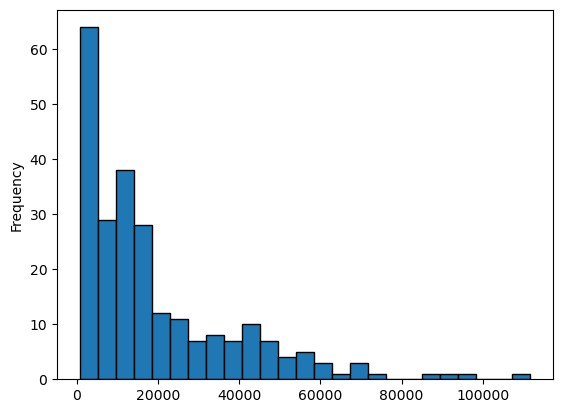

In [20]:
gdp_2020['GDP_per_capita'].plot(kind = 'hist',edgecolor = 'black', bins = 25)

<Axes: xlabel='GDP_per_capita'>

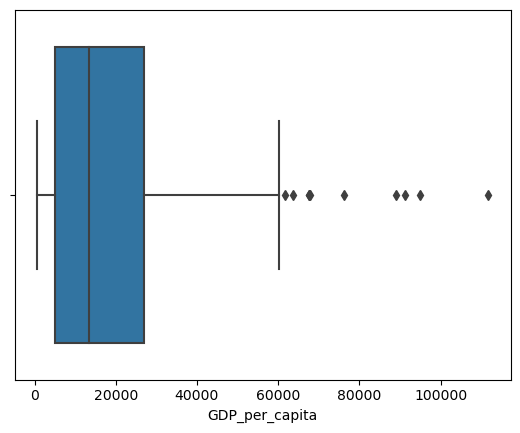

In [21]:
sns.boxplot(gdp_2020, x= 'GDP_per_capita')

C:\Users\asus\AppData\Local\Temp\ipykernel_18528\2741135137.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(gdp_2020)


<Axes: ylabel='Density'>

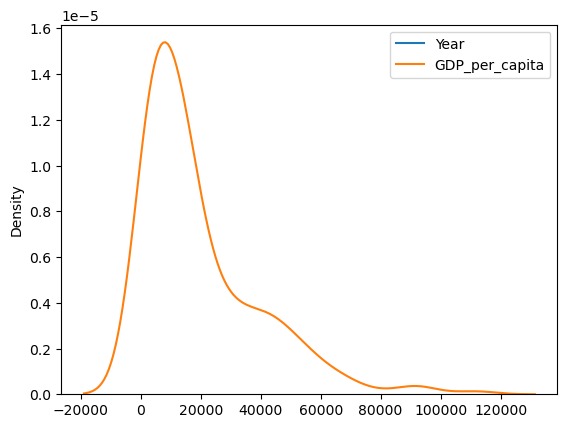

In [22]:
sns.kdeplot(gdp_2020)

<Axes: xlabel='GDP_per_capita'>

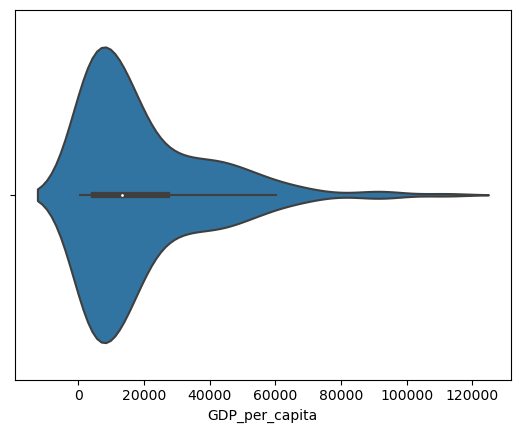

In [23]:
sns.violinplot(gdp_2020, x= 'GDP_per_capita')

#### Question 8 answers: ^^^^ Seems that the Histogram plot for this type of data is hard to read compared to the others

### Question 9: What was the median GDP per capita value in 2020?

In [24]:
gdp_2020['GDP_per_capita'].median()

13357.997573370474

#### Answer: ^^^

### Question 10: For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots: A boxplot A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn) A scatterplot A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [25]:
gdp_df.loc[gdp_df.Year.isin([1990, 2000, 2010, 2020])]

,Country,Year,GDP_per_capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [26]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_per_capita'>

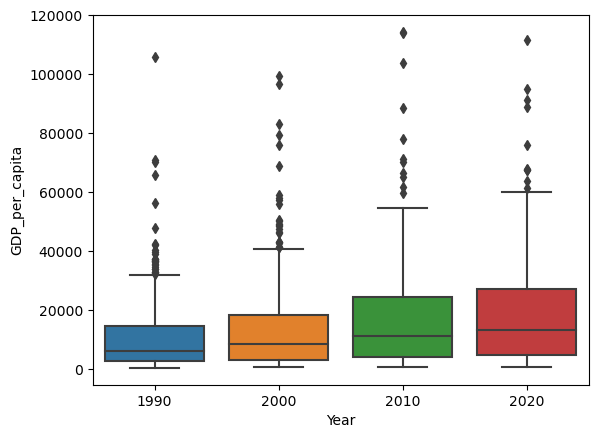

In [27]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_per_capita"] )

<Axes: xlabel='Year', ylabel='GDP_per_capita'>

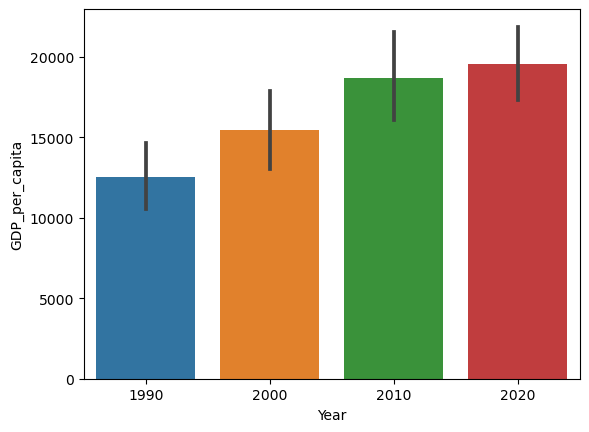

In [28]:
sns.barplot(
x='Year',
y='GDP_per_capita',
data=gdp_decades)

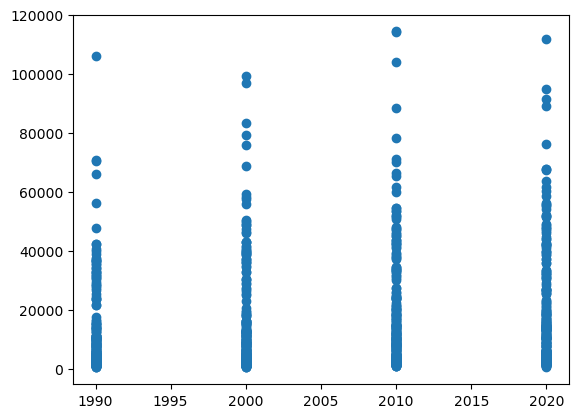

In [29]:
plt.scatter(x=gdp_decades['Year'], y=gdp_decades["GDP_per_capita"])

<Axes: xlabel='Year', ylabel='GDP_per_capita'>

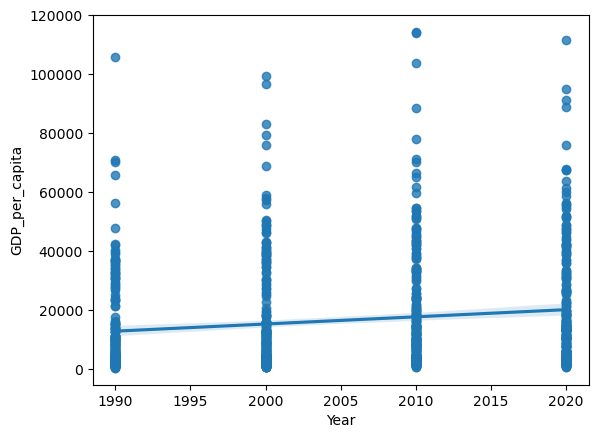

In [30]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_per_capita'])

#### Question 10 answer: Every decade there seems to be a growth in the gdp per capita

### Question 11: Which country was the first to have a GDP per capita greater than 100,000?

In [31]:
gdp_df.loc[gdp_df['GDP_per_capita'] >= 100000].sort_values('Year').head()

,Country,Year,GDP_per_capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


#### Question 11 answer: The first country to pass 100k Gdp Per Capita is United Arab Emirates

### Question 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [32]:
###.nlargest

gdp_df.loc[gdp_df['Year'] == 2020].nlargest(1,'GDP_per_capita')

,Country,Year,GDP_per_capita
4148,Luxembourg,2020,111751.314751


In [33]:
gdp_lux = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']

In [34]:
gdp_lux.head()

,Country,Year,GDP_per_capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558


<Axes: xlabel='Year', ylabel='GDP_per_capita'>

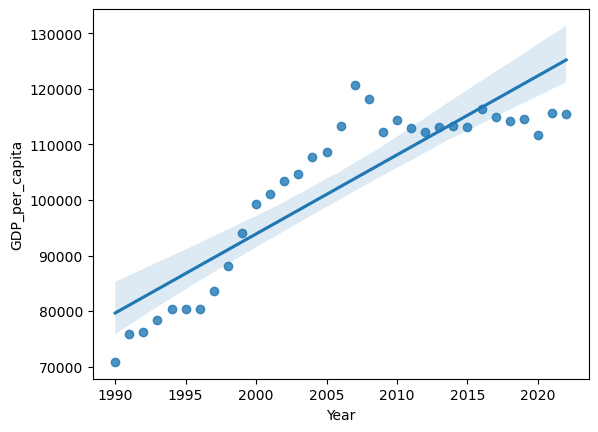

In [35]:
sns.regplot(x=gdp_lux['Year'], y=gdp_lux['GDP_per_capita'])

#### Question 12 answer: Luxembourg Has the highest gdp per capita. From 1990 through 2020 there as been a steady growth average with a peak of over 120000 in 2006 - 2007. BUT they have been getting more stable with little growth starting around 2010

### Question 13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [36]:
### .nsmallest()

gdp_df.loc[gdp_df['Year'] == 2020].nsmallest(1,'GDP_per_capita')

,Country,Year,GDP_per_capita
973,Burundi,2020,711.355263


In [37]:
gdp_burn = gdp_df.loc[gdp_df['Country'] == 'Burundi']

<Axes: xlabel='Year', ylabel='GDP_per_capita'>

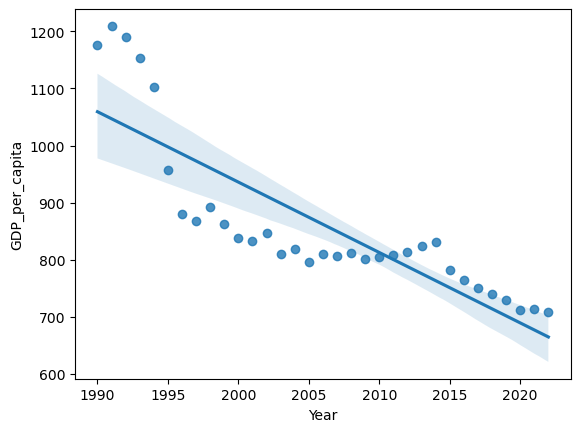

In [38]:
sns.regplot(x=gdp_burn['Year'], y=gdp_burn['GDP_per_capita'])

#### Question 13 answer: Burundi had the lowest gdp per capita during the year of 2020. During the givin date Burundi's average gdp has been slowly decreaseing 

### Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

### Question 14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [39]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4496).sample(n=4496)

In [40]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
1989,Ireland,1999,10.933809,6.0
100,Antigua and Barbuda,2012,58.000000,NaN
1384,Finland,1994,4.915099,66.0
2747,Mongolia,2012,16.400000,110.0
2635,Mauritania,2002,0.363229,NaN


In [41]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 3197 to 2635
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4496 non-null   object 
 1   Year             4496 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 175.6+ KB


In [42]:
internet_df.shape

(4496, 4)

### Question 15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [43]:
internet_df.drop(columns = {'Value Footnotes'}).rename(columns = {'Country or Area': 'Country',
                                   'Year':'Year',
                                  'Value': 'Internet_Users_Pct'})

,Country,Year,Internet_Users_Pct
3197,Philippines,2002,4.332276
1240,Equatorial Guinea,2011,11.500000
390,Belize,1998,2.091516
2137,Kazakhstan,2009,18.200000
1261,Eritrea,2009,0.540000
...,...,...,...
1989,Ireland,1999,10.933809
100,Antigua and Barbuda,2012,58.000000
1384,Finland,1994,4.915099
2747,Mongolia,2012,16.400000


In [44]:
internet_df = internet_df.drop(columns = {'Value Footnotes'}).rename(columns = {'Country or Area': 'Country',
                                   'Year':'Year',
                                  'Value': 'Internet_Users_Pct'})

In [45]:
internet_df.head()

,Country,Year,Internet_Users_Pct
3197,Philippines,2002,4.332276
1240,Equatorial Guinea,2011,11.500000
390,Belize,1998,2.091516
2137,Kazakhstan,2009,18.200000
1261,Eritrea,2009,0.540000


### Question 16: Look at the number of observations in this dataset per year. What do you notice?

In [46]:
internet_df.pivot_table(values = 'Internet_Users_Pct', index= 'Year')

,Internet_Users_Pct
Year,
1960,0.000000
1965,0.000000
1970,0.000000
1975,0.000000
1976,0.000000
1977,0.000000
1978,0.000000
1979,0.000000
1980,0.000000


#### Question 16 answer: After looking at the internet users pct column in multiple years I have notice that the early years have a low average internet user pct compared to the later years. There has been a 0% internet usage until 1990

### Question 17: What is the first year to have a non-zero internet users percentage value?

In [47]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').head()

,Country,Year,Internet_Users_Pct
1107,Denmark,1990,0.097277
2095,Japan,1990,0.020294
1388,Finland,1990,0.401088
1413,France,1990,0.052778
2048,Italy,1990,0.017545


#### Question 17 answer: The first year to have a non 0 Internet users pct is 1990. Though it doesn't break the 1 marker it still has more then 0 

### Question 18: How does the distribution of internet users percent differ for 2000 and 2014?

In [48]:
internet_df[internet_df['Year'].isin(['2000', '2014'])]

,Country,Year,Internet_Users_Pct
1686,Guatemala,2014,23.400000
2132,Kazakhstan,2014,54.890000
92,Angola,2000,0.105046
2063,Jamaica,2000,3.115778
776,Central African Rep.,2000,0.053394
...,...,...,...
2401,Lithuania,2000,6.427067
1018,Cyprus,2014,69.330000
2600,Marshall Islands,2014,16.800000
2387,Lithuania,2014,72.130000


In [49]:
internet_diff = internet_df[internet_df['Year'].isin(['2000', '2014'])]

In [50]:
internet_diff

,Country,Year,Internet_Users_Pct
1686,Guatemala,2014,23.400000
2132,Kazakhstan,2014,54.890000
92,Angola,2000,0.105046
2063,Jamaica,2000,3.115778
776,Central African Rep.,2000,0.053394
...,...,...,...
2401,Lithuania,2000,6.427067
1018,Cyprus,2014,69.330000
2600,Marshall Islands,2014,16.800000
2387,Lithuania,2014,72.130000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

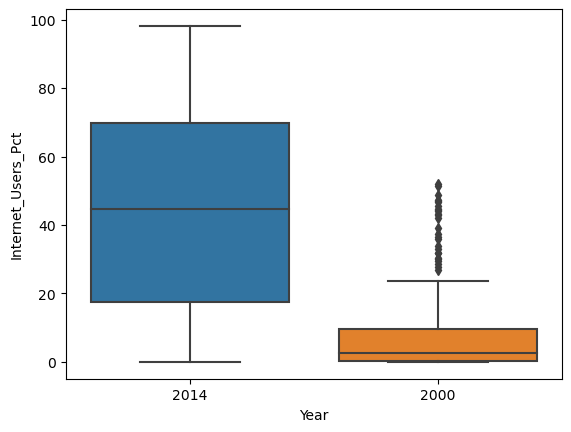

In [51]:
sns.boxplot(
x='Year',
y='Internet_Users_Pct',
data= internet_diff)

#### Question 18 answer: The pct differs greatly between the 2 years. 2014 has almost 5 times a greater average of internet users then 2000

### Question 19: For how many countries was the percentage of internet users below 5% in 2014?

In [52]:
internet_df = internet_df.drop([4495], axis=0)

In [53]:
internet_df

,Country,Year,Internet_Users_Pct
3197,Philippines,2002,4.332276
1240,Equatorial Guinea,2011,11.500000
390,Belize,1998,2.091516
2137,Kazakhstan,2009,18.200000
1261,Eritrea,2009,0.540000
...,...,...,...
1989,Ireland,1999,10.933809
100,Antigua and Barbuda,2012,58.000000
1384,Finland,1994,4.915099
2747,Mongolia,2012,16.400000


In [54]:
internet_df[internet_df['Year'] == '2014']

,Country,Year,Internet_Users_Pct
1686,Guatemala,2014,23.40
2132,Kazakhstan,2014,54.89
2175,Kiribati,2014,12.25
3939,Tajikistan,2014,17.49
1511,Germany,2014,86.19
...,...,...,...
953,Cote d'Ivoire,2014,14.60
1018,Cyprus,2014,69.33
2600,Marshall Islands,2014,16.80
2387,Lithuania,2014,72.13


In [55]:
internet_2014 = internet_df[internet_df['Year'] == '2014']

In [56]:
internet_2014

,Country,Year,Internet_Users_Pct
1686,Guatemala,2014,23.40
2132,Kazakhstan,2014,54.89
2175,Kiribati,2014,12.25
3939,Tajikistan,2014,17.49
1511,Germany,2014,86.19
...,...,...,...
953,Cote d'Ivoire,2014,14.60
1018,Cyprus,2014,69.33
2600,Marshall Islands,2014,16.80
2387,Lithuania,2014,72.13


In [57]:
internet_2014[internet_2014['Internet_Users_Pct'] < 5.0].shape

(16, 3)

#### Answer: there are 16 countries with less then 5% 

### Question 20: Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [58]:
internet_df['Year'] = internet_df['Year'].astype('int64')

In [59]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4495 entries, 3197 to 2635
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.5+ KB


In [60]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer')

In [61]:
gdp_and_internet_use

,Country,Year,GDP_per_capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Turkey,2006,NaN,18.240000
8732,Virgin Islands (U.S.),1995,NaN,2.801958
8733,Yemen,2002,NaN,0.518796
8734,Saint Lucia,2014,NaN,51.000000


#### Answer: ^^^

### Question 21: Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?



In [62]:
internet_2014 = internet_df[internet_df['Year'] == 2014]

In [63]:
internet_2014.head()

,Country,Year,Internet_Users_Pct
1686,Guatemala,2014,23.40
2132,Kazakhstan,2014,54.89
2175,Kiribati,2014,12.25
3939,Tajikistan,2014,17.49
1511,Germany,2014,86.19


In [64]:
internet_2014.shape

(202, 3)

In [65]:
internet_2014.sort_values('Internet_Users_Pct', ascending = False)

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90
...,...,...,...
3648,Somalia,2014,1.63
623,Burundi,2014,1.38
4019,Timor-Leste,2014,1.14
1256,Eritrea,2014,0.99


In [66]:
internet_df.loc[internet_df.Country.isin(['Iceland', 'Bermuda', 'Norway'])]

,Country,Year,Internet_Users_Pct
1874,Iceland,2006,89.510000
1890,Iceland,1990,0.000000
1877,Iceland,2003,83.140000
425,Bermuda,2004,60.990867
1885,Iceland,1995,11.215876
...,...,...,...
3039,Norway,1991,1.407395
1880,Iceland,2000,44.470534
1886,Iceland,1994,6.794812
1876,Iceland,2004,83.880000


In [67]:
gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(['Iceland', 'Bermuda', 'Norway'])]

,Country,Year,GDP_per_capita,Internet_Users_Pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
7690,Iceland,1990,NaN,0.000000
7902,Iceland,1991,NaN,0.505129
8379,Iceland,1992,NaN,1.539160
8435,Iceland,1993,NaN,2.667825


In [68]:
Top_3_Countrys = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(['Iceland', 'Bermuda', 'Norway'])]

In [69]:
Top_3_Countrys

,Country,Year,GDP_per_capita,Internet_Users_Pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
7690,Iceland,1990,NaN,0.000000
7902,Iceland,1991,NaN,0.505129
8379,Iceland,1992,NaN,1.539160
8435,Iceland,1993,NaN,2.667825


C:\Users\asus\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


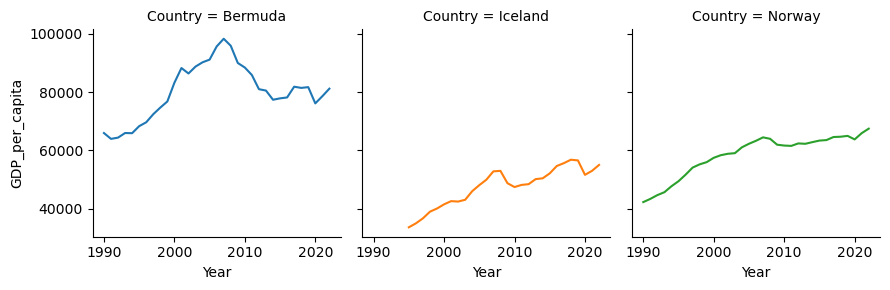

In [70]:
g = sns.FacetGrid(Top_3_Countrys, col="Country", hue='Country')
g.map_dataframe(sns.lineplot, x='Year', y='GDP_per_capita')

#### Answer: Bermuda, Iceland and Norway have the highest internet user percent and here are graphs showing there GDP per capita through out the years

### Question 22: Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [71]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

,Country,Year,GDP_per_capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8687,New Caledonia,2014,NaN,70.00
8694,Iran (Islamic Rep. of),2014,NaN,39.35
8704,Syria,2014,NaN,28.09
8709,Cote d'Ivoire,2014,NaN,14.60


In [72]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [73]:
gdp_and_internet_use_2014

,Country,Year,GDP_per_capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8687,New Caledonia,2014,NaN,70.00
8694,Iran (Islamic Rep. of),2014,NaN,39.35
8704,Syria,2014,NaN,28.09
8709,Cote d'Ivoire,2014,NaN,14.60


#### Answer: ^^

### Question 23: Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_per_capita', ylabel='Internet_Users_Pct'>

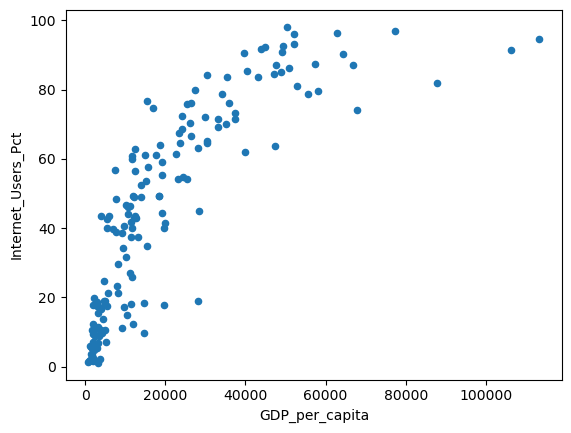

In [74]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].plot(kind= 'scatter', x='GDP_per_capita', y='Internet_Users_Pct')

#### Answer: ^^^

### Question 24: Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [75]:
pd.qcut(gdp_and_internet_use_2014['GDP_per_capita'], 3, ['Low', 'Medium', 'High'])

7          Low
28         Low
61         Low
94      Medium
127     Medium
         ...  
8687       NaN
8694       NaN
8704       NaN
8709       NaN
8734       NaN
Name: GDP_per_capita, Length: 281, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [76]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_per_capita'], 3, ['Low', 'Medium', 'High'])

C:\Users\asus\AppData\Local\Temp\ipykernel_18528\2334427643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_per_capita'], 3, ['Low', 'Medium', 'High'])


In [77]:
gdp_and_internet_use_2014.sort_values('GDP_per_capita')

,Country,Year,GDP_per_capita,Internet_Users_Pct,GDP_group
1223,Central African Republic,2014,765.259554,NaN,Low
979,Burundi,2014,831.294839,1.38,Low
6279,Somalia,2014,925.577067,1.63,Low
1636,Dem. Rep. Congo,2014,999.072134,NaN,Low
5080,Niger,2014,1119.137212,1.95,Low
...,...,...,...,...,...
8687,New Caledonia,2014,NaN,70.00,NaN
8694,Iran (Islamic Rep. of),2014,NaN,39.35,NaN
8704,Syria,2014,NaN,28.09,NaN
8709,Cote d'Ivoire,2014,NaN,14.60,NaN


#### Answer: Here are the qcut answers for the gdp and internet usage in 2014 with a added column showing which catagorey it is in

### Question 25: Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [80]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

GDP_group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64

#### Answer: ^^^